## Computational Readability Analysis of Competency Questions

To quantitatively assess the understandability of the competency questions (CQs) generated by different methods, we employed a suite of computational readability measures. Readability formulas provide objective, replicable scores that estimate the ease with which a reader can understand a written text. While many of these formulas were originally designed for prose, their application to shorter texts like CQs can still offer valuable comparative insights, particularly when analyzing variations across different generation approaches.

Our selection of measures aims to provide a multi-faceted view of readability, considering aspects like sentence length, word complexity (syllabic and character-based), and the use of common versus difficult vocabulary. All analyses were performed on the English-language CQs.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
cq_df = pd.read_csv("../data/bme_cq_measures.csv")
print(f"Loaded {len(cq_df)} competency questions (CQs)")

Loaded 204 competency questions (CQs)


### Selected Readability Measures

The following readability metrics were computed for each competency question using the `textstat` and `readability` Python libraries:

1.  **Flesch-Kincaid Grade Level (FKGL)**
    The Flesch-Kincaid Grade Level estimates the U.S. school grade level an individual would need to comprehend the text. Similar to FRE, its calculation is rooted in average sentence length and the average number of syllables per word. FKGL offers an intuitive interpretation of readability in terms of educational attainment. While the concept of a "grade level" for a single, short question should be interpreted cautiously, it serves as a strong comparative metric when evaluating CQs produced by different generation methods.

2.  **Gunning Fog Index (GFI)**
    The Gunning Fog Index estimates the years of formal education a person would require to understand the text upon a first reading. This index particularly focuses on average sentence length and the percentage of "complex" words, defined as those containing three or more syllables. GFI was chosen because of its sensitivity to lengthy sentences and the prevalence of polysyllabic words, which can be indicative of jargon or overly complex phrasing in CQs, thereby helping to identify questions that might be unnecessarily difficult due to word choice.

3.  **Coleman-Liau Index (CLI)**
    The Coleman-Liau Index calculates an approximate U.S. grade level required to understand a text, but uniquely, it bases its assessment on the average number of characters per word and the average number of words per sentence. Unlike syllable-based formulas, its reliance on character counts can be more straightforward to compute and is sometimes considered less ambiguous. CLI was selected because it offers an alternative perspective on word complexity and is generally regarded as robust for a variety of text types, including the shorter format of CQs.

4.  **Automated Readability Index (ARI)**
    The Automated Readability Index also produces an approximation of the U.S. grade level needed to comprehend a text. Its formula considers characters per word and words per sentence, similar to the Coleman-Liau Index. Including ARI alongside CLI allows for a more comprehensive character-based assessment of readability, providing another well-established index for comparing the CQs.

5.  **Dale-Chall Readability Score (DCR)**
    The Dale-Chall Readability Score estimates a U.S. grade level by analyzing average sentence length and the percentage of "difficult words." Uniquely, "difficult words" in the Dale-Chall formula are those not found on a specially derived list of approximately 3,000 words generally understood by most 4th-grade students. This score is valuable for its emphasis on familiar vocabulary. In the context of CQs, it can help identify whether questions use common language or rely on terms that might be unfamiliar to a broader audience, even if those terms aren't necessarily long or polysyllabic. It is acknowledged, however, that domain-specific CQs might naturally contain necessary technical terms not on the Dale-Chall list, which could inflate the score.

Another set of metrics to consider, but currently left under analysis:

6.  **Difficult Words Count (DWC)**
    This metric provides a direct count of the number of words within the text that are classified as "difficult." The `readability` library, used in this study, typically defines difficult words based on whether they appear on a pre-defined list of common words (e.g., not being on the Dale-Chall list of familiar words) or by exceeding a certain syllable threshold. This measure was chosen for its straightforward and interpretable insight into lexical complexity; a high count of difficult words in CQs could flag the use of specialized jargon or unnecessarily obscure terminology, directly impacting comprehension.


### Some considerations on their applicability to questions/CQs
While these measures were used in previous studies on CQ [c.f. REVONT], it is important to acknowledge that most standard readability formulas were developed and validated using continuous prose rather than short, interrogative sentences like CQs. Consequently:
* **Scores as comparative indicators:** We interpret these scores primarily as comparative indicators between different CQ generation methodologies rather than absolute, definitive measures of the "grade level" or "reading ease" of an individual question.
* **Sensitivity to length:** Some formulas can be sensitive to very short texts. Since CQs are typically concise, we focus on the relative differences in scores across the dataset.

### Measures Considered but Excluded

* **SMOG Index:** While a popular measure, the SMOG Index traditionally requires a sample of 30 or more sentences for reliable calculation. As individual CQs are much shorter, applying SMOG could lead to less stable or meaningful results for single questions.
* Similar considerations for the RIX, which relies on sentence count and the number of characters in long words.

By employing this selection of readability measures, we aim to gain robust, quantitative insights into how different CQ generation methods affect the linguistic complexity and potential understandability of the resulting questions.

In [4]:
cq_df.columns

Index(['cq', 'set', 'score', 'read_Flesch_kincaid_grade', 'read_Coleman_liau',
       'read_Automated_readability', 'read_Gunning_fog',
       'read_Dale_chall_readability', 'read_Linsear_write', 'read_Clauses',
       'ambiguity'],
      dtype='object')

In [5]:
# First create a copy of the dataframe with only the columns we need
cq_df = cq_df[["cq", "set", "score", "ambiguity"]].copy()

In [6]:
import textstat

def compute_focused_readability(cq):
    # textstat measures
    fkgl = textstat.flesch_kincaid_grade(cq)  # higher means more difficult
    gfi = textstat.gunning_fog(cq)  # higher means more difficult
    cli = textstat.coleman_liau_index(cq)  # higher means more difficult
    ari = textstat.automated_readability_index(cq)  # higher means more difficult
    dcr = textstat.dale_chall_readability_score(cq)  # higher means more difficult
    # readability-measures
    # r = Readability(cq)
    # ari = r.ari()  # higher means more difficult
    # dcr = r.dale_chall() # higher means more difficult
    # dwc = r.difficult_words_count()  # higher means more difficult
    # rix = r.rix()  # higher means more difficult
    # smog = textstat.smog_index(cq) # Potentially exclude or handle with care
    return fkgl, gfi, cli, ari, dcr

In [7]:
cq_df[["read_fkgl", "read_gfi", "read_cli", "read_ari", "read_dcr"]] = \
    cq_df["cq"].apply(compute_focused_readability).apply(pd.Series)

acronyms_to_names = {
    "read_fkgl": "Flesch-Kincaid Grade Level",
    "read_gfi": "Gunning Fog Index",
    "read_cli": "Coleman-Liau Index",
    "read_dcr": "Dale-Chall Readability Score",
    "read_ari": "Automated Readability Index",
    # "read_dwc": "Difficult Words Count",
    # "read_rix": "Readability Index",
}

In [8]:
cq_df

,cq,set,score,ambiguity,read_fkgl,read_gfi,read_cli,read_ari,read_dcr
0,Are there images of the item being used or cre...,1,2,1,7.2,11.35,5.03,4.3,7.93
1,When is a loaned item expected to be returned?,1,2,0,4.4,8.04,4.78,2.9,11.10
2,Is the artefact out for repair?,1,2,0,2.1,2.40,3.35,2.0,6.57
3,What type of artist is Queen?,1,2,0,0.9,2.40,1.38,0.4,6.57
4,What are the types of the artefacts that be di...,1,2,0,2.5,4.00,6.76,4.8,8.87
...,...,...,...,...,...,...,...,...,...
199,How can the system represent the relationship ...,5,0,0,9.9,13.86,11.77,11.8,10.98
200,How can the system represent the status of a l...,5,0,0,6.2,8.33,7.79,7.4,13.48
201,What information about loaned artifacts should...,5,0,0,12.7,16.47,14.49,13.2,15.42
202,How does the system distinguish between artifa...,5,0,0,9.5,13.90,11.77,10.7,10.35


In [9]:

from sklearn.preprocessing import MinMaxScaler
import numpy as np

def post_process_readability_metrics(df: pd.DataFrame, metric_columns: list = None) -> pd.DataFrame:
    """
    Performs post-processing (cleaning and Min-Max scaling) on readability metrics
    in a Pandas DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the competency questions and
                           their readability metrics.
        metric_columns (list, optional): List of column names that contain
                                         the readability metrics to be processed.
                                         If None, the function will try to infer them
                                         from columns starting with 'read_'.

    Returns:
        pd.DataFrame: The DataFrame with processed readability metrics.
                      Original metric columns are preserved, and new columns
                      with a '_scaled' suffix are added for the scaled values.
    """
    processed_df = df.copy()

    # --- Determine metric columns ---
    if metric_columns is None:
        inferred_metrics = [col for col in processed_df.columns if col.startswith('read_')]
        if not inferred_metrics:
            raise ValueError(
                "No metric columns specified and could not infer any columns starting with 'read_'. "
                "Please provide the 'metric_columns' argument."
            )
        metric_columns = inferred_metrics
        print(f"Info: Using inferred metric columns: {metric_columns}")
    else:
        # Ensure all specified metric columns exist in the DataFrame
        missing_cols = [col for col in metric_columns if col not in processed_df.columns]
        if missing_cols:
            raise ValueError(f"The following specified metric columns are not in the DataFrame: {missing_cols}")
        print(f"Info: Using specified metric columns: {metric_columns}")


    print("\n--- Step 1: Data Cleaning and Verification ---")
    # 1a. Check for Missing Values (NaNs)
    nan_counts_before_imputation = processed_df[metric_columns].isnull().sum()
    if nan_counts_before_imputation.sum() > 0:
        print("Warning: Missing values found in metric columns before imputation:")
        print(nan_counts_before_imputation[nan_counts_before_imputation > 0])
        
        # Imputation strategy: Mean imputation
        for col in metric_columns:
            if processed_df[col].isnull().any():
                mean_val = processed_df[col].mean()
                processed_df[col].fillna(mean_val, inplace=True)
                print(f"Info: Imputed NaNs in '{col}' with column mean: {mean_val:.2f}")
        
        nan_counts_after_imputation = processed_df[metric_columns].isnull().sum().sum()
        if nan_counts_after_imputation == 0:
            print("Info: All missing values handled.")
        else:
            # This case should ideally not be reached if imputation is successful
            print("Warning: Some missing values might still be present after imputation attempt.")
            
    else:
        print("Info: No missing values found in metric columns.")

    # 1b. Verify Score Ranges (Simple Check for Negatives where not expected)
    for col in metric_columns:
        if (processed_df[col] < 0).any():
            num_negative = (processed_df[col] < 0).sum()
            print(f"Warning: {num_negative} negative value(s) found in column '{col}'. Review these values as they might be unexpected for this metric.")

    print("\n--- Step 3: Min-Max Scaling ---")
    scaler = MinMaxScaler()
    
    # Create new column names for scaled metrics
    scaled_metric_columns = [f"{col}_scaled" for col in metric_columns]
    
    # Apply scaling
    processed_df[scaled_metric_columns] = scaler.fit_transform(processed_df[metric_columns])
    
    print(f"Info: Applied Min-Max scaling (to [0, 1] range) for columns: {metric_columns}.")
    print(f"Info: Scaled metrics stored in new columns: {scaled_metric_columns}")

    return processed_df

In [10]:
cleaned_readability_df = post_process_readability_metrics(
    cq_df, metric_columns=["read_fkgl", "read_gfi", "read_cli", "read_ari", "read_dcr"])
cleaned_readability_df.head(3)
# cleaned_readability_df.columns


Info: Using specified metric columns: ['read_fkgl', 'read_gfi', 'read_cli', 'read_ari', 'read_dcr']

--- Step 1: Data Cleaning and Verification ---
Info: No missing values found in metric columns.

--- Step 3: Min-Max Scaling ---
Info: Applied Min-Max scaling (to [0, 1] range) for columns: ['read_fkgl', 'read_gfi', 'read_cli', 'read_ari', 'read_dcr'].
Info: Scaled metrics stored in new columns: ['read_fkgl_scaled', 'read_gfi_scaled', 'read_cli_scaled', 'read_ari_scaled', 'read_dcr_scaled']


,cq,set,score,ambiguity,read_fkgl,read_gfi,read_cli,read_ari,read_dcr,read_fkgl_scaled,read_gfi_scaled,read_cli_scaled,read_ari_scaled,read_dcr_scaled
0,Are there images of the item being used or cre...,1,2,1,7.2,11.35,5.03,4.3,7.93,0.401130,0.404061,0.401987,0.398268,0.412603
1,When is a loaned item expected to be returned?,1,2,0,4.4,8.04,4.78,2.9,11.10,0.242938,0.266888,0.392434,0.337662,0.586301
2,Is the artefact out for repair?,1,2,0,2.1,2.40,3.35,2.0,6.57,0.112994,0.033154,0.337791,0.298701,0.338082


In [21]:
from config import SET_MAPPING

# generate a table with mean and std of the readability metrics (not the scaled ones) aggregated per set
# just including mean and std with +/- std witihin the same cell
readability_agg = cleaned_readability_df.groupby("set")[["read_fkgl", "read_gfi", "read_cli", "read_ari", "read_dcr"]].agg(["mean", "std"])
readability_agg.columns = ["_".join(col).strip() for col in readability_agg.columns.values]
readability_agg = readability_agg.reset_index()
readability_agg.columns = ["set", "read_fkgl_mean", "read_fkgl_std", "read_gfi_mean", "read_gfi_std",
                            "read_cli_mean", "read_cli_std", "read_ari_mean", "read_ari_std",
                            "read_dcr_mean", "read_dcr_std"]
readability_agg["read_fkgl"] = readability_agg.apply(
    lambda x: f"{x['read_fkgl_mean']:.2f} +/- {x['read_fkgl_std']:.2f}", axis=1)
readability_agg["read_gfi"] = readability_agg.apply(
    lambda x: f"{x['read_gfi_mean']:.2f} +/- {x['read_gfi_std']:.2f}", axis=1)
readability_agg["read_cli"] = readability_agg.apply(
    lambda x: f"{x['read_cli_mean']:.2f} +/- {x['read_cli_std']:.2f}", axis=1)
readability_agg["read_ari"] = readability_agg.apply(
    lambda x: f"{x['read_ari_mean']:.2f} +/- {x['read_ari_std']:.2f}", axis=1)
readability_agg["read_dcr"] = readability_agg.apply(
    lambda x: f"{x['read_dcr_mean']:.2f} +/- {x['read_dcr_std']:.2f}", axis=1)
readability_agg = readability_agg[["set", "read_fkgl", "read_gfi", "read_cli", "read_ari", "read_dcr"]]
readability_agg.columns = ["set", "FKGL", "GFI", "CLI", "ARI", "DCR"]
readability_agg = readability_agg.rename(columns={"set": "CQ Set"})
readability_agg = readability_agg.set_index("CQ Set")
readability_agg = readability_agg.rename_axis("CQ Set")
readability_agg = readability_agg.rename_axis(None, axis=1)
readability_agg = readability_agg.reset_index()

# User the SET mappings to rename the sets
readability_agg["CQ Set"] = readability_agg["CQ Set"].map(SET_MAPPING)


readability_agg



,CQ Set,FKGL,GFI,CLI,ARI,DCR
0,HA-1,5.63 +/- 2.80,8.03 +/- 3.81,4.61 +/- 3.92,3.04 +/- 3.22,9.59 +/- 1.62
1,HA-2,6.88 +/- 3.42,9.43 +/- 4.35,5.60 +/- 4.40,3.73 +/- 3.74,8.76 +/- 2.00
2,Pattern,7.66 +/- 2.81,9.64 +/- 3.48,9.32 +/- 5.00,6.94 +/- 4.07,10.94 +/- 2.63
3,GPT4.1,11.64 +/- 2.69,15.38 +/- 3.09,12.36 +/- 3.11,11.70 +/- 2.49,12.67 +/- 1.89
4,Gemini 2.5 Pro,9.72 +/- 2.67,15.26 +/- 3.70,11.45 +/- 3.80,10.71 +/- 3.58,12.90 +/- 2.64


In [ ]:
# # remove the score and ambiguity columns
# cleaned_readability_df = cleaned_readability_df.drop(columns=["score", "ambiguity"])
# # dump the dataframe to a csv file
# cleaned_readability_df.to_csv("../data/bme_cq_readibility.csv", index=False)

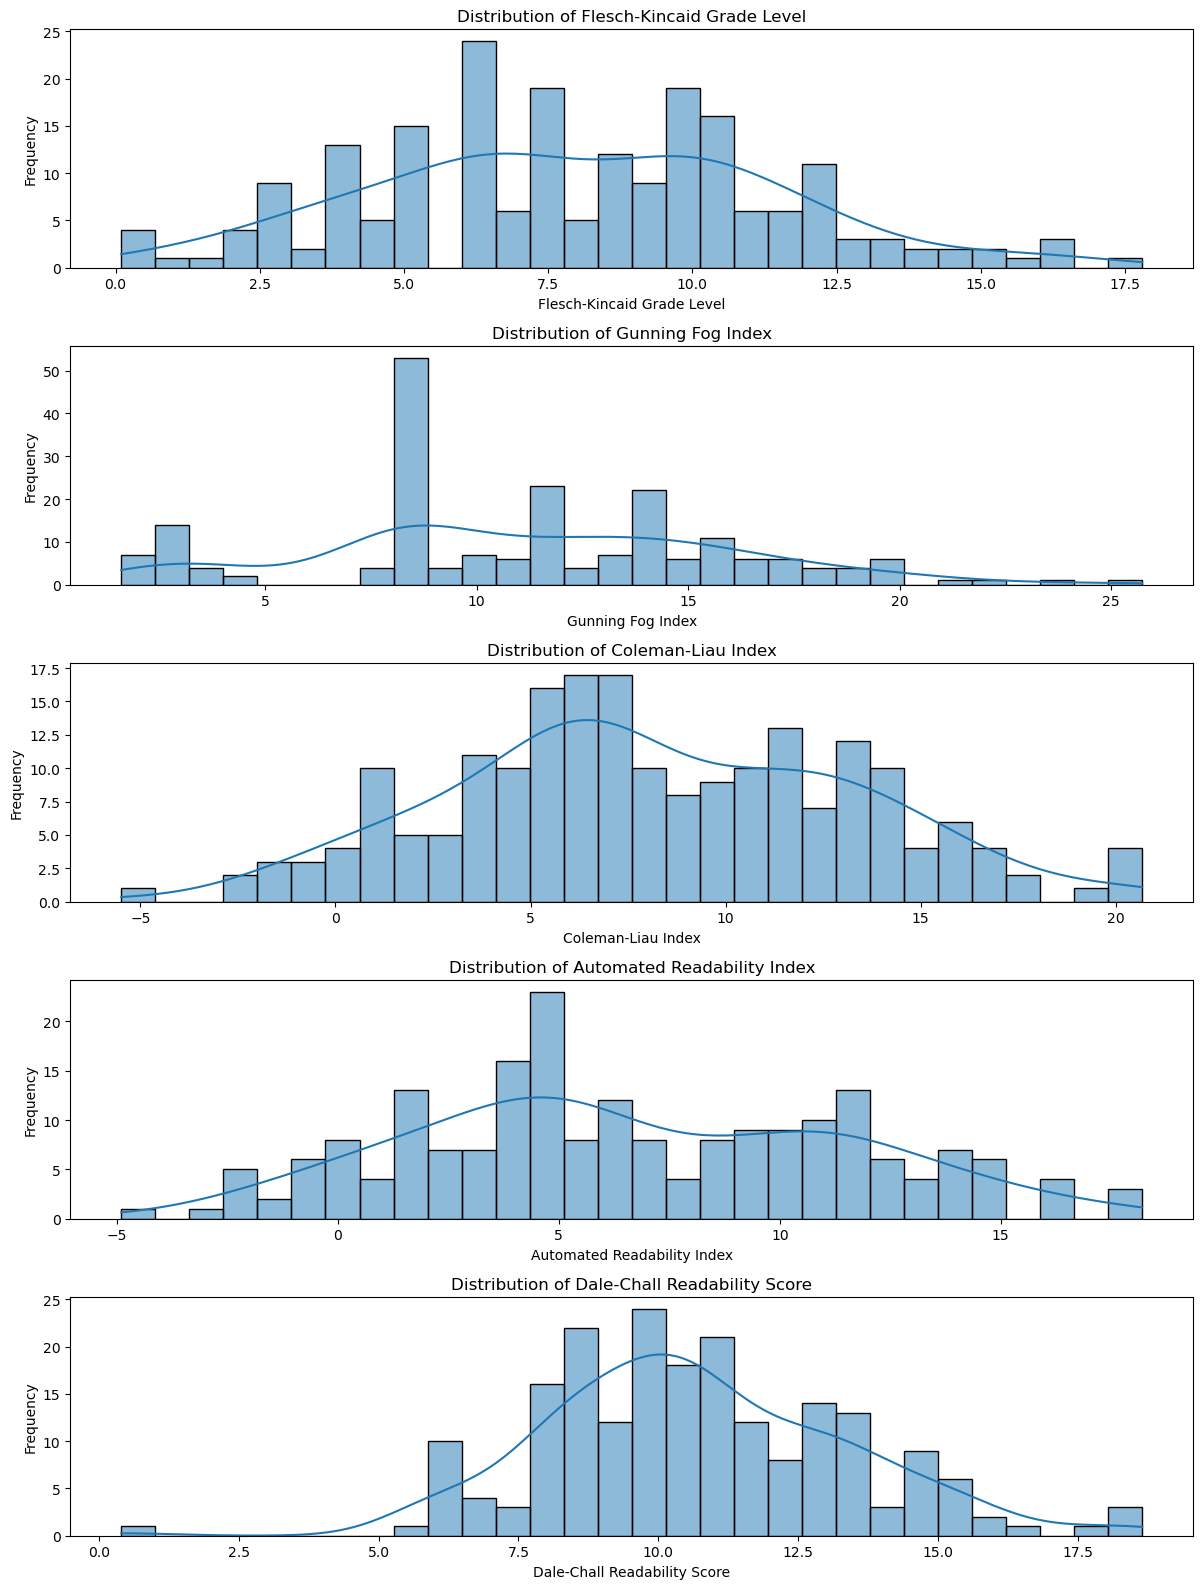

In [12]:
# Let's now plot the distribution of the readability scores
import matplotlib.pyplot as plt
import seaborn as sns

def plot_readability_distribution(df: pd.DataFrame, metric_columns: list = None):
    """
    Plots the distribution of specified readability metrics in a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the competency questions and
                           their readability metrics.
        metric_columns (list, optional): List of column names that contain
                                         the readability metrics to be plotted.
                                         If None, the function will try to infer them
                                         from columns starting with 'read_'.
    """
    if metric_columns is None:
        metric_columns = [col for col in df.columns if col.startswith('read_')]
        if not metric_columns:
            raise ValueError("No metric columns specified and could not infer any columns starting with 'read_'.")
    
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 16))
    
    # Loop through each metric column and plot its distribution
    for col in metric_columns:
        plt.subplot(len(metric_columns), 1, metric_columns.index(col) + 1)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Distribution of {acronyms_to_names.get(col, col)}")
        plt.xlabel(acronyms_to_names.get(col, col))
        plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

plot_readability_distribution(cleaned_readability_df,
                              metric_columns=["read_fkgl", "read_gfi", "read_cli", "read_ari", "read_dcr"])

In [13]:
from config import SET_MAPPING
# the set mapping is a dict that maps the set numbers to their corresponding names

The boxplot shows the **distribution of readability scores** for each metric (FKGL, GFI, CLI) across different sets.

The boxes represent the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box represents the median score. The "whiskers" extend to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles, respectively. Points outside this range are considered outliers and are plotted individually.


The idea here, as a proxy to a more in-depth statistical analysis, is to compare the distributions of readability scores (FKGL, GFI, CLI) across different sets (HA-1, HA-2, etc).

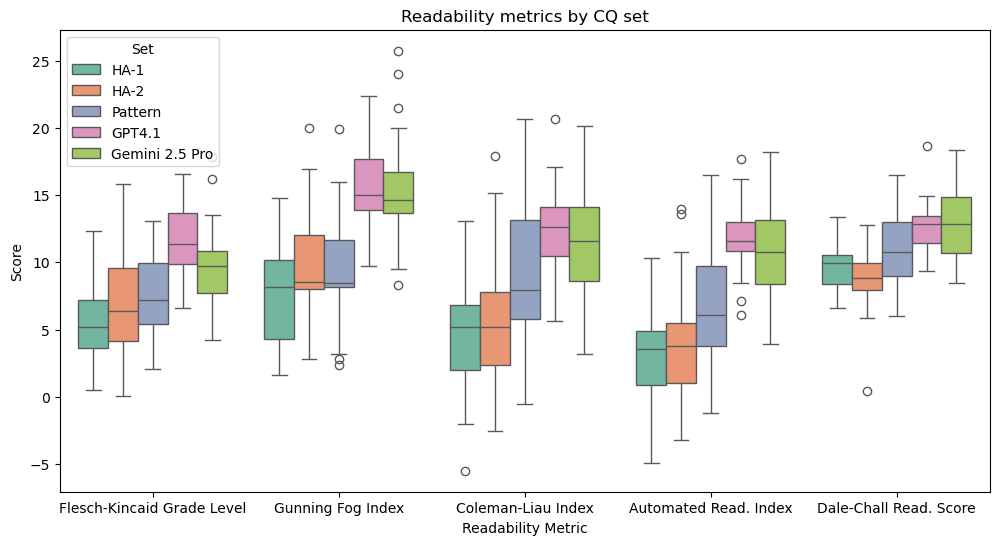

In [16]:
# Reshape the DataFrame into a long format
melted_df = cleaned_readability_df.melt(
	id_vars=["set"], 
	value_vars=["read_fkgl", "read_gfi", "read_cli", "read_ari", "read_dcr"],
	var_name="Metric", 
	value_name="Value"
)

# Map metric acronyms to their full names for better readability
melted_df["Metric"] = melted_df["Metric"].map(acronyms_to_names)
# rename the set column to the set name
melted_df["set"] = melted_df["set"].map(SET_MAPPING)

# use a palette where where the first colours are incrementally darker
# palette = sns.color_palette("dark", len(melted_df["set"].unique()))
# abbreviate the metric names
melted_df["Metric"] = melted_df["Metric"].str.replace("Readability", "Read.")

# Create the boxplot and set the figure size
plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="set", data=melted_df, palette="Set2")
# plt.xticks(rotation=45)
plt.title("Readability metrics by CQ set")
plt.xlabel("Readability Metric")
plt.ylabel("Score")
plt.legend(title="Set")
# save the figure in PDF format
plt.savefig("../plots/readability_metrics_by_set.pdf", bbox_inches='tight')
plt.show()



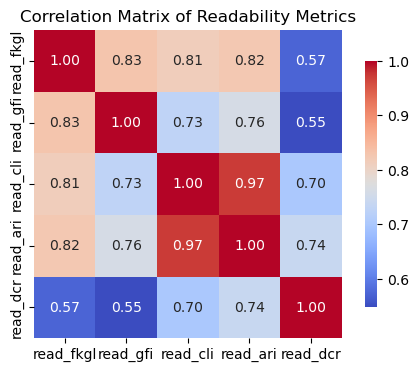

In [17]:
# Now let's plot the correlation matrix across all readability metrics
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df: pd.DataFrame, metric_columns: list = None):
    """
    Plots the correlation matrix for specified readability metrics in a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the competency questions and
                           their readability metrics.
        metric_columns (list, optional): List of column names that contain
                                         the readability metrics to be plotted.
                                         If None, the function will try to infer them
                                         from columns starting with 'read_'.
    """
    if metric_columns is None:
        metric_columns = [col for col in df.columns if col.startswith('read_')]
        if not metric_columns:
            raise ValueError("No metric columns specified and could not infer any columns starting with 'read_'.")
    
    # Compute the correlation matrix
    corr = df[metric_columns].corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(6, 4))
    
    # Create a heatmap of the correlation matrix
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
    
    plt.title("Correlation Matrix of Readability Metrics")
    # save the figure in PDF format
    plt.savefig("../plots/readability_metrics_correlation_matrix.pdf", bbox_inches='tight')
    plt.show()


plot_correlation_matrix(cleaned_readability_df,
                        metric_columns=["read_fkgl", "read_gfi", "read_cli", "read_ari", "read_dcr"])

Explained Variance Ratios for each PCA Component:
Component 1: 0.8028
Component 2: 0.1059
Component 3: 0.0565
Component 4: 0.0298
Component 5: 0.0050


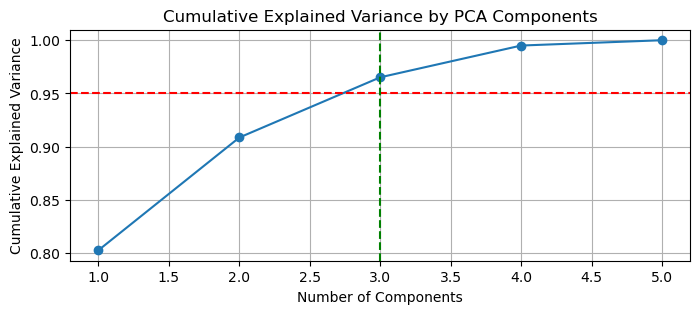

In [59]:
# Perform PCA and choose the number of components that explain 95% of the variance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(
    cleaned_readability_df[["read_fkgl", "read_gfi", "read_cli", "read_ari", "read_dcr"]])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Print the explained variance ratios for each component
print("Explained Variance Ratios for each PCA Component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i + 1}: {var:.4f}")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 3))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--')
plt.text(np.argmax(cumulative_variance >= 0.95) + 1, 0.96, '', color='g', fontsize=12)
plt.grid()
plt.show()

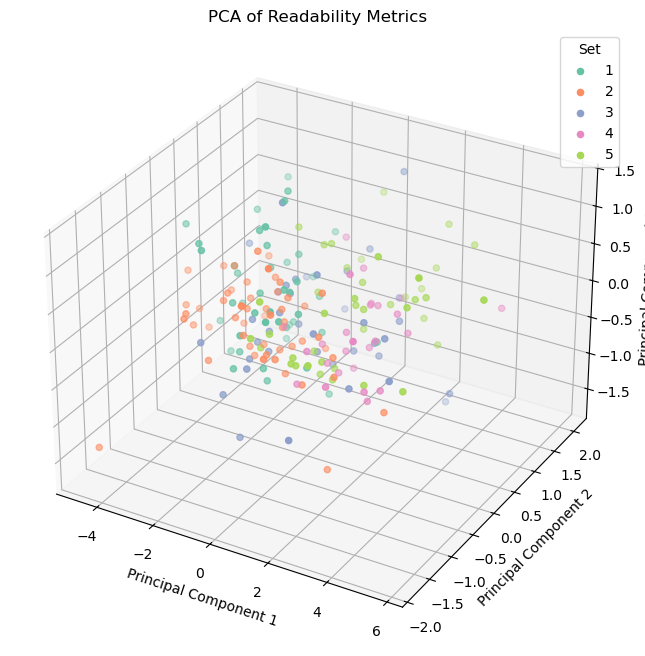

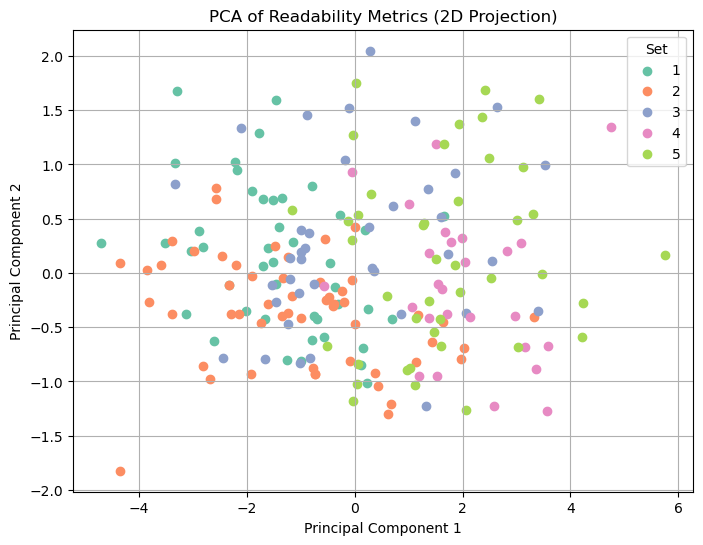

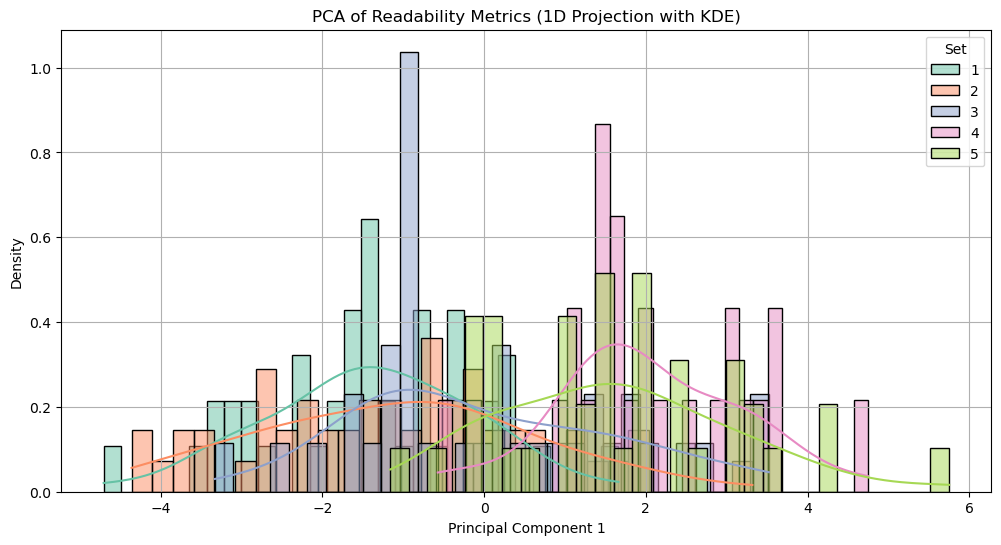

In [61]:
# Use the first 3 components to plot the distribution of the CQs per set in a 3D plot

# Perform PCA with 3 components, now that we know we need 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)
# Create a DataFrame with the PCA results and the set names
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2", "PC3"])
pca_df["set"] = cleaned_readability_df["set"].values
# Plot the PCA results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Create a color palette for the sets
palette = sns.color_palette("Set2", len(pca_df["set"].unique()))
# Create a mapping from set names to colors 
set_colors = {set_name: palette[i] for i, set_name in enumerate(pca_df["set"].unique())}
# Plot each set with its corresponding color
for set_name, color in set_colors.items():
    ax.scatter(pca_df[pca_df["set"] == set_name]["PC1"],
               pca_df[pca_df["set"] == set_name]["PC2"],
               pca_df[pca_df["set"] == set_name]["PC3"],
               label=set_name, color=color)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("PCA of Readability Metrics")
ax.legend(title="Set")
plt.show()


# And now using only the first two components
# Plot the PCA results in 2D
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
# Create a color palette for the sets
palette = sns.color_palette("Set2", len(pca_df["set"].unique()))
# Create a mapping from set names to colors
set_colors = {set_name: palette[i] for i, set_name in enumerate(pca_df["set"].unique())}
# Plot each set with its corresponding color
for set_name, color in set_colors.items():
    ax.scatter(pca_df[pca_df["set"] == set_name]["PC1"],
               pca_df[pca_df["set"] == set_name]["PC2"],
               label=set_name, color=color)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("PCA of Readability Metrics (2D Projection)")
ax.legend(title="Set")
plt.grid()
plt.show()


# And now just using the first component as histograms with KDE
plt.figure(figsize=(12, 6))
# Create a color palette for the sets
palette = sns.color_palette("Set2", len(pca_df["set"].unique()))
# Create a mapping from set names to colors
set_colors = {set_name: palette[i] for i, set_name in enumerate(pca_df["set"].unique())}
# Plot each set with its corresponding color
for set_name, color in set_colors.items():
    sns.histplot(pca_df[pca_df["set"] == set_name]["PC1"],
                 label=set_name, color=color, kde=True, stat="density", bins=30)
plt.xlabel("Principal Component 1")
plt.ylabel("Density")
plt.title("PCA of Readability Metrics (1D Projection with KDE)")
plt.legend(title="Set")
plt.grid()
plt.show()
